In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sqlite3
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [2]:
#read the dataset
conn=sqlite3.connect("final.sqlite")
final=pd.read_sql_query('''select * from Reviews''',conn)
conn.close()
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText,CleanedNoStem,CleanedSummary
0,540125,B002W08W56,A2STPOZAT37RNE,Betty Baker,1,1,1,1300320000,"Wonderful, but surprised to find this size can...",Great beans....the best texture hands down. T...,great bean best textur hand seem great tast do...,great beans best texture hands seem great tast...,wonderful surprised find size
1,31763,B000UXWQMC,A115Y8R40DCT3I,Guy,0,0,1,1345161600,better than expected,I usually buy whole pitted olives and when I b...,usual buy whole pit oliv bought good wasnt who...,usually buy whole pitted olives bought good wa...,better expected
2,509504,B000P09RJA,A2BR8LGC8N6XQD,dj2u,0,4,0,1278374400,Wrong size bars sent,The first shipment was just as ordered. This ...,first shipment order last shipment not bar wen...,first shipment ordered last shipment not bars ...,wrong size bars sent
3,27728,B000K8ESBY,A1RYTIMIWPDJ4O,"Bill Ison ""Bill""",0,0,1,1256169600,Coffee flavoring,"<a href=""http://www.amazon.com/gp/product/B000...",flavour creation coffe flavor tablet french va...,flavour creations coffee flavoring tablets fre...,coffee flavoring
4,128657,B001AVJT0K,AJ6SZ4YAPOOO7,Mwebi,0,0,1,1348099200,They all come running,"I have the pickiest cats, they hate 99/100 kin...",pickiest cat hate kind food better vari otherw...,pickiest cats hate kinds food better vary othe...,come running


In [3]:
#Creating a new balanced dataframe 
negative=final[final['Score']==0][['Score','Time','CleanedSummary','CleanedText']] 
positive=final[final['Score']==1][['Score','Time','CleanedSummary','CleanedText']]
data=pd.concat([negative,positive.iloc[:65000,:]],axis=0,ignore_index=True) #concatenation
data.sort_values('Time',inplace=True) #sorting on time
data.head()

,Score,Time,CleanedSummary,CleanedText
89279,1,944092800,entertainingl funny,beetlejuic well written movi everyth excel act...
99092,1,944438400,modern day fairy tale,twist rumplestiskin captur film star michael k...
21840,0,948240000,clamshell edition edited version,alway enjoy movi funni entertain didnt hesit p...
114632,1,951523200,bettlejuice bettlejuice bettlejuice,happen say name three time michael keaten star...
113134,1,961718400,great product,realli good idea final product outstand use de...


In [4]:
data['Score'].value_counts() #balanced dataset

1    65000
0    57110
Name: Score, dtype: int64

## Reviews

* BOW - multinomialNB

In [5]:
bow_vect=CountVectorizer() #initializing the vectorizer
bow=bow_vect.fit_transform(data['CleanedText'].values) 

In [6]:
#train test split 
x=bow  
y=data['Score'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,shuffle=False) #since it is a time series dataset ,the shuffle should be equal to false

the optimal value of alpha is 1.44


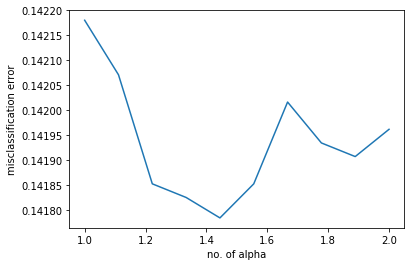

In [9]:
#Code to perform k fold
alpha=np.linspace(1,2,10)
cv_scores=[]

for a in alpha:
    clf=MultinomialNB(alpha=a)
    score=cross_val_score(clf,x_train,y_train,cv=6,scoring='accuracy') #Hyper parameter -CV
    cv_scores.append(score.mean())
    
MSE=[1-x for x in cv_scores]

optimal_alpha=alpha[MSE.index(min(MSE))]
print('the optimal value of alpha is %0.2f' % optimal_alpha)
plt.plot(alpha,MSE)
plt.xlabel('no. of alpha')
plt.ylabel('misclassification error')
plt.show()

In [10]:
#fitting the model on optimal value of k
clf=MultinomialNB(alpha=optimal_alpha)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test) #generating prediction
acc=accuracy_score(y_test,y_pred,normalize=True)*float(100)
print(acc)
confusion_matrix(y_test,y_pred).T

85.7669314552


array([[20679,  3169],
       [ 3783, 21213]], dtype=int64)

* TFIDF - multinomialNB

In [11]:
tf_idf=TfidfVectorizer() #initializing the vectorizer
tfidf=tf_idf.fit_transform(data['CleanedText'].values)

In [12]:
#train test split 
x=tfidf  
y=data['Score'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,shuffle=False)

the optimal value of alpha is 0.40


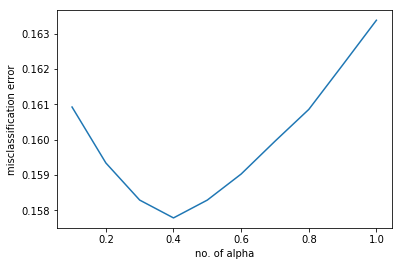

In [14]:
#Code to perform k fold
alpha=np.linspace(0.1,1,10)
cv_scores=[]

for a in alpha:
    clf=MultinomialNB(alpha=a)
    score=cross_val_score(clf,x_train,y_train,cv=6,scoring='accuracy') #Hyper parameter -CV
    cv_scores.append(score.mean())
    
MSE=[1-x for x in cv_scores]

optimal_alpha=alpha[MSE.index(min(MSE))]
print('the optimal value of alpha is %0.2f' % optimal_alpha)
plt.plot(alpha,MSE)
plt.xlabel('no. of alpha')
plt.ylabel('misclassification error')
plt.show()

In [15]:
#fitting the model on optimal value of k
clf=MultinomialNB(alpha=optimal_alpha)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test) #generating prediction
acc=accuracy_score(y_test,y_pred,normalize=True)*float(100)
print(acc)
cof=confusion_matrix(y_test,y_pred).T
cof

84.2293833429


array([[19128,  2369],
       [ 5334, 22013]], dtype=int64)

In [16]:
#Evalulation matrices
tp=int(cof[1:,1:])
fp=int(cof[1:,:1])
fn=int(cof[:1,1:])
pre=tp/(tp+fp)
rec=tp/(tp+fn)
fsco=(2*pre*rec)/(pre+rec)
print("precision is =",pre)
print("recall is =",rec)
print("fscore is =",fsco)

precision is = 0.8049511829451128
recall is = 0.9028381592978427
fscore is = 0.8510893309362253
